In [8]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.io import fits
from hcipy import *
from scipy import ndimage
from scipy import fft
from oah_tools import *

(489, 489)
(293, 293)
(395, 395)
(303, 303)
(261, 261)
(261, 261)


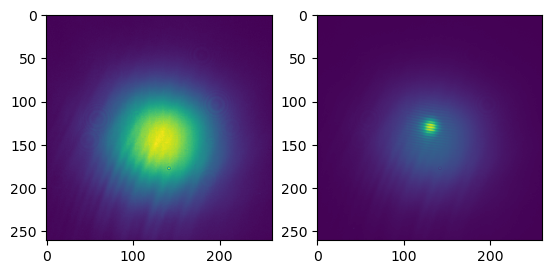

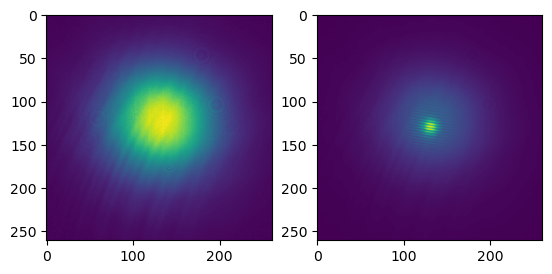

In [9]:
data_dir = "/home/vfndev/yxin/holography/loc_test_230119/"

dark = fits.getdata(data_dir+'bkgd_0.9968710000000001_avgs100.fits')

ref1 = fits.getdata(data_dir+'loc_1/ref_0.9968710000000001_avgs100.fits')-dark
holo1 = fits.getdata(data_dir+'loc_1/holo_0.9968710000000001_avgs100.fits')-dark

centerx = 268
centery = 297
crop_width = 489

holo1_crop = holo1[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
ref1_crop = ref1[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]

print(holo1_crop.shape)

ref2 = fits.getdata(data_dir+'loc_2/ref_0.9968710000000001_avgs100.fits')-dark
holo2 = fits.getdata(data_dir+'loc_2/holo_0.9968710000000001_avgs100.fits')-dark

centerx = 279
centery = 147
crop_width = 293

holo2_crop = holo2[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
ref2_crop = ref2[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]

print(holo2_crop.shape)

ref3 = fits.getdata(data_dir+'loc_3/ref_0.9968710000000001_avgs100.fits')-dark
holo3 = fits.getdata(data_dir+'loc_3/holo_0.9968710000000001_avgs100.fits')-dark

centerx = 282
centery = 443
crop_width = 395

holo3_crop = holo3[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
ref3_crop = ref3[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]

print(holo3_crop.shape)

ref4 = fits.getdata(data_dir+'loc_4/ref_0.9968710000000001_avgs100.fits')-dark
holo4 = fits.getdata(data_dir+'loc_4/holo_0.9968710000000001_avgs100.fits')-dark

centerx = 361
centery = 290
crop_width = 303

holo4_crop = holo4[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
ref4_crop = ref4[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]

print(holo4_crop.shape)

ref5 = fits.getdata(data_dir+'loc_5/ref_0.9968710000000001_avgs100.fits')-dark
holo5 = fits.getdata(data_dir+'loc_5/holo_0.9968710000000001_avgs100.fits')-dark

centerx = 131
centery = 291
crop_width = 261

holo5_crop = holo5[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
ref5_crop = ref5[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]

print(holo5_crop.shape)

ref5_rs = fits.getdata(data_dir+'loc_5_ref_shift/ref_0.9968710000000001_avgs100.fits')-dark
holo5_rs = fits.getdata(data_dir+'loc_5_ref_shift/holo_0.9968710000000001_avgs100.fits')-dark

centerx = 131
centery = 291
crop_width = 261

holo5_rs_crop = holo5_rs[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
ref5_rs_crop = ref5_rs[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]

print(holo5_rs_crop.shape)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(ref5_crop)
plt.subplot(1,2,2)
plt.imshow(holo5_crop)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(ref5_rs_crop)
plt.subplot(1,2,2)
plt.imshow(holo5_rs_crop)



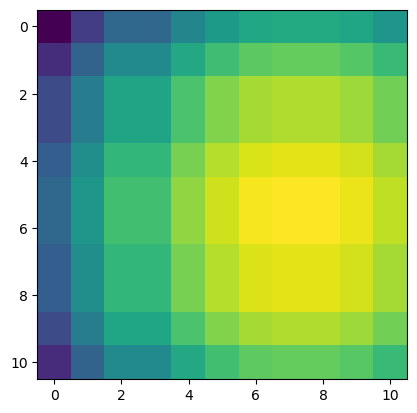

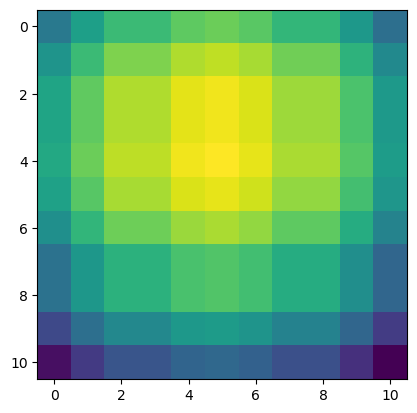

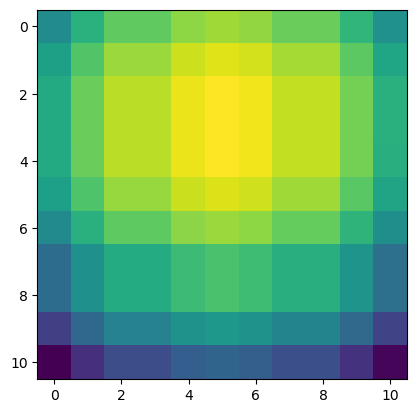

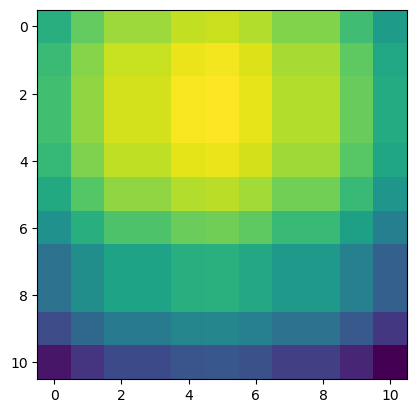

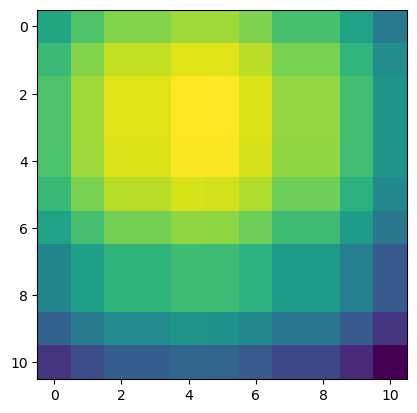

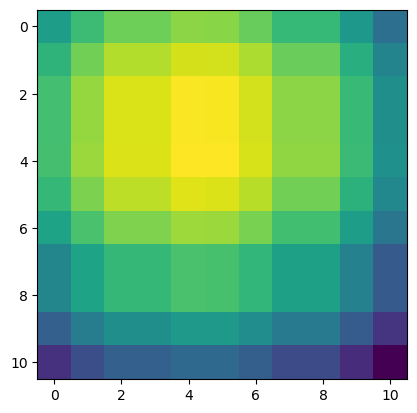

In [10]:
holos = [holo1_crop,holo2_crop,holo3_crop,holo4_crop,holo5_crop,holo5_rs_crop]
refs = [ref1_crop,ref2_crop,ref3_crop,ref4_crop,ref5_crop,ref5_rs_crop]

best_r = 14.25
best_Vnum = 3.0

x_starts = [92, 56, 76, 59, 50, 50]
y_starts = [265, 159, 215, 165, 142, 142]
box_widths = [131, 101, 131, 101, 85, 85]

best_xs = []
best_ys = []

for n in range(len(holos)):
    recon_map_field = retrieve_mode(holos[n],refs[n],x1=x_starts[n],y1=y_starts[n],box_width=box_widths[n])
    grid = recon_map_field.grid
    lp_modes = make_lp_modes(grid, best_Vnum, best_r*15e-6)
    x1s = np.linspace(x_starts[n]-4,x_starts[n]+4,11)
    y1s = np.linspace(y_starts[n]-4,y_starts[n]+4,11)
    best_x, best_y = optimize_shift_location(holos[n],refs[n],x1s,y1s,box_widths[n],lp_modes)
    best_xs.append(best_x)
    best_ys.append(best_y)

0.9401613287788413
0.0024291640574687465


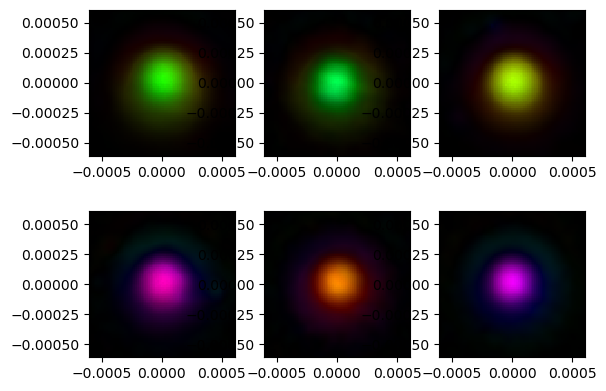

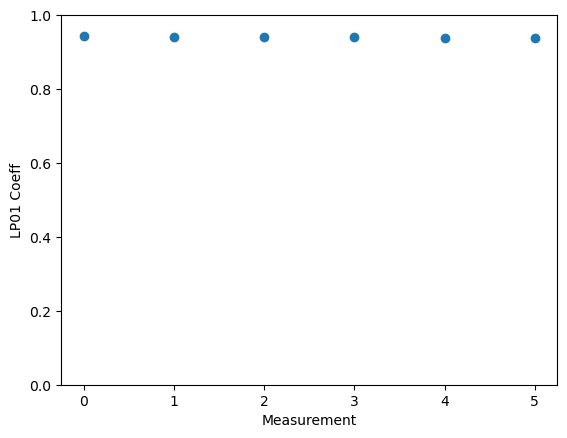

In [12]:
fields = []
coeffs = []
plt.figure()
for n in range(len(holos)):
    ret_field = retrieve_mode(holos[n],refs[n],x1=best_xs[n],y1=best_ys[n],box_width=box_widths[n])
    sq_int = np.sum(np.square(np.abs(ret_field)))
    ret_field = ret_field/np.sqrt(sq_int)
    grid = ret_field.grid
    lp_modes = make_lp_modes(grid, best_Vnum, best_r*15e-6)
    lp_sq_int = np.sum(np.square(np.abs(lp_modes[0])))
    lp01_mode = lp_modes[0]/np.sqrt(lp_sq_int)
    #print(np.sum(np.square(np.abs(lp01_mode))))
    coeff = np.abs(np.sum(np.conj(lp01_mode)*ret_field,axis=None)/np.sum(np.conj(lp01_mode)*lp01_mode,axis=None))
    coeffs.append(coeff)
    fields.append(ret_field)
    plt.subplot(2,3,n+1)
    imshow_field(ret_field)
    
plt.figure()
plt.scatter(range(6),coeffs)
plt.ylim([0,1])
plt.xlabel('Measurement')
plt.ylabel('LP01 Coeff')

print(np.mean(coeffs))
print(np.std(coeffs)/np.mean(coeffs))

#plt.figure()
#imshow_field(lp_modes[0])

In [13]:
def sim_mode_zernike(znums,zamps,radius=best_r,best_Vnum=3.0):
    lp_modes = make_lp_modes(grid, best_Vnum, radius*15e-6)
    
    pupil_d = 0.0127*8e2
    pupil_grid = make_pupil_grid(128,diameter=pupil_d)
    prop = FraunhoferPropagator(pupil_grid, grid,focal_length=1)
    wf = Wavefront(lp_modes[0],wavelength=1550e-6)
    pup_wf = prop.backward(wf)
    zernike_modes = make_zernike_basis(11, D=pupil_d, grid=pupil_grid)
    for n in range(len(znums)):
        aber = PhaseApodizer(zernike_modes[znums[n]]*zamps[n]) #in radians
        aber_wf = aber(pup_wf)
    wf_out = prop.forward(aber_wf)
    return wf_out.electric_field

0.9995315443033652


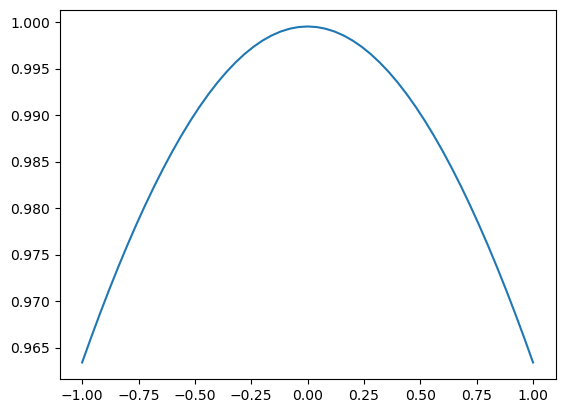

In [14]:
#compare astig+trunc sim against perfect mode
zamps = np.linspace(-1,1,51)
astig_coeffs = np.zeros(zamps.shape)

for n in range(len(zamps)):
    e_out = sim_mode_zernike([5],[zamps[n]])
    sq_int = np.sum(np.square(np.abs(e_out)))
    e_out = e_out/np.sqrt(sq_int)
    astig_coeffs[n] = np.abs(np.sum(np.conj(lp01_mode)*e_out,axis=None)/np.sum(np.conj(lp01_mode)*lp01_mode,axis=None))
    
plt.figure()
plt.plot(zamps,astig_coeffs)

print(np.max(astig_coeffs))

In [15]:
#fit best zernike value to data
rs = np.linspace(10,20,21)
znums = [5,6,7,8,9,10]
zamps = np.linspace(-1,1,51)
z_coeffs = np.zeros((len(rs),len(znums),len(zamps)))

ret_field = retrieve_mode(holos[0],refs[0],x1=best_xs[0],y1=best_ys[0],box_width=box_widths[0])
sq_int = np.sum(np.square(np.abs(ret_field)))
ret_field = ret_field/np.sqrt(sq_int)

for k in range(len(rs)):
    for m in range(len(znums)):
        for n in range(len(zamps)):
            e_out = sim_mode_zernike([znums[m]],[zamps[n]],rs[k])
            sq_int = np.sum(np.square(np.abs(e_out)))
            e_out = e_out/np.sqrt(sq_int)
            z_coeffs[k,m,n] = np.abs(np.sum(np.conj(ret_field)*e_out,axis=None)/np.sum(np.conj(e_out)*e_out,axis=None))

plt.figure()
plt.imshow(z_coeffs[10])

/home/vfndev/yxin/holography/oah_tools.py:33: RuntimeWarning: invalid value encountered in sqrt
  recon_map_large = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(fftgram_filt)))/np.sqrt(ref)
/home/vfndev/yxin/holography/oah_tools.py:33: RuntimeWarning: divide by zero encountered in true_divide
  recon_map_large = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(fftgram_filt)))/np.sqrt(ref)
/home/vfndev/yxin/holography/oah_tools.py:33: RuntimeWarning: invalid value encountered in true_divide
  recon_map_large = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(fftgram_filt)))/np.sqrt(ref)


KeyboardInterrupt: 

In [ ]:
np.save('z_coeffs',z_coeffs)

10.0
[ 0.08  0.   -0.12  0.08 -0.04 -0.32]
0.9328051186816781
10.5
[ 0.08  0.   -0.12  0.08 -0.04 -0.32]
0.9449785310251807
11.0
[ 0.08  0.   -0.12  0.08 -0.04 -0.32]
0.955367230937077
11.5
[ 0.08  0.   -0.12  0.08 -0.04 -0.32]
0.9639751996850033
12.0
[ 0.08  0.   -0.12  0.08 -0.04 -0.32]
0.9708483892613287
12.5
[ 0.08  0.   -0.12  0.08 -0.04 -0.32]
0.9760501592935084
13.0
[ 0.08  0.   -0.12  0.08 -0.04 -0.28]
0.9793693026844502
13.5
[ 0.12  0.   -0.12  0.08 -0.04 -0.28]
0.9815169529511533
14.0
[ 0.12  0.   -0.12  0.08 -0.04 -0.28]
0.9822833948087387
14.5
[ 0.12  0.   -0.12  0.08 -0.04 -0.28]
0.9817809174795772
15.0
[ 0.12  0.   -0.12  0.08 -0.04 -0.28]
0.9801224321479858
15.5
[ 0.12  0.   -0.12  0.04 -0.04 -0.28]
0.977420373870898
16.0
[ 0.12  0.   -0.12  0.04 -0.04 -0.28]
0.9737808126385635
16.5
[ 0.12  0.   -0.12  0.04 -0.04 -0.28]
0.9693075661678123
17.0
[ 0.12  0.04 -0.12  0.04 -0.04 -0.28]
0.9640950897491455
17.5
[ 0.12  0.04 -0.12  0.04 -0.08 -0.28]
0.9582341989292459
18.0
[ 0.1

/home/vfndev/anaconda3/envs/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


0.9220120540197995


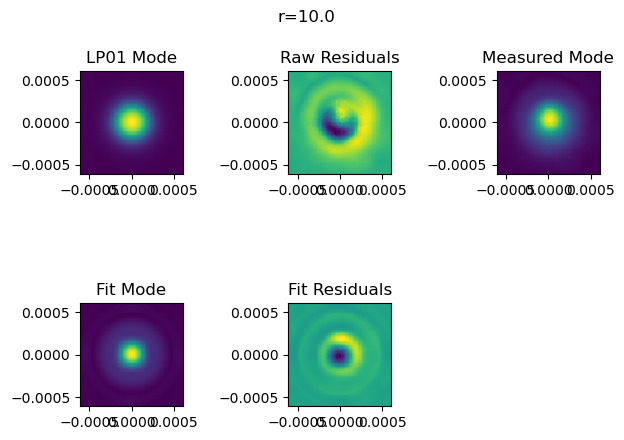

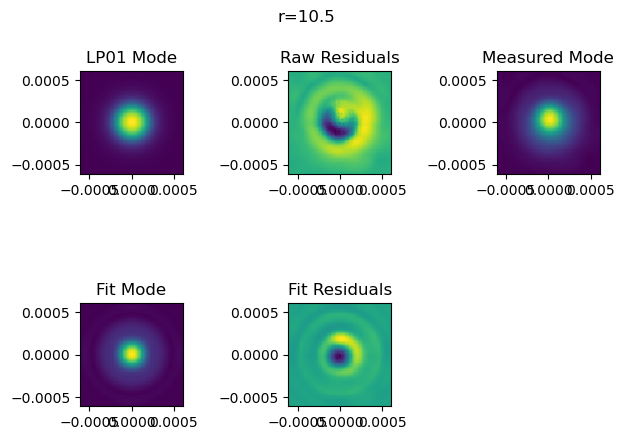

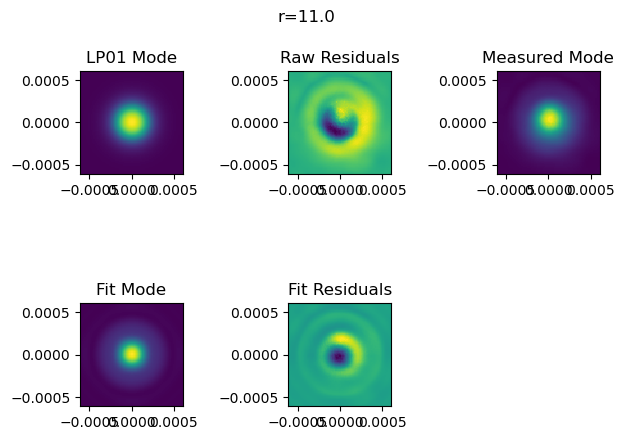

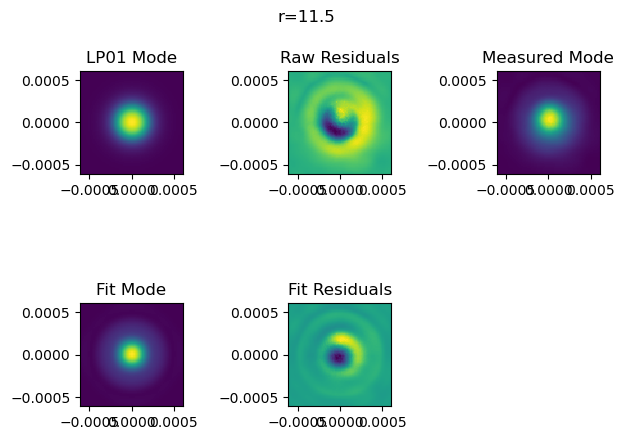

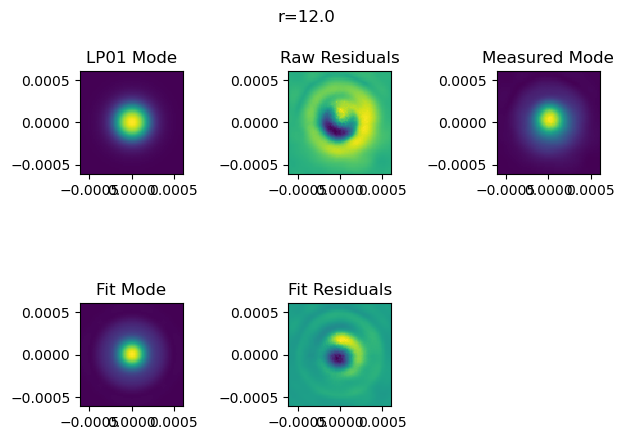

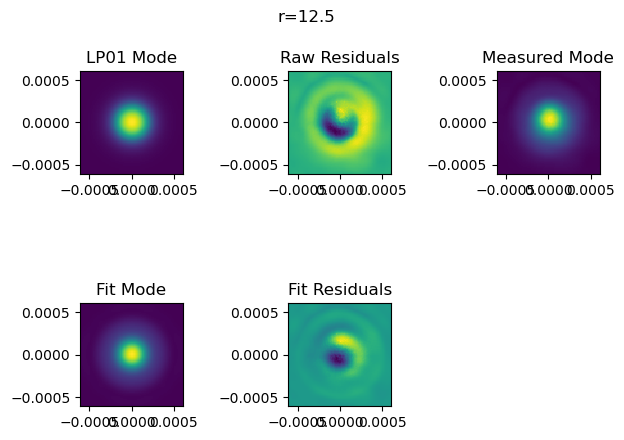

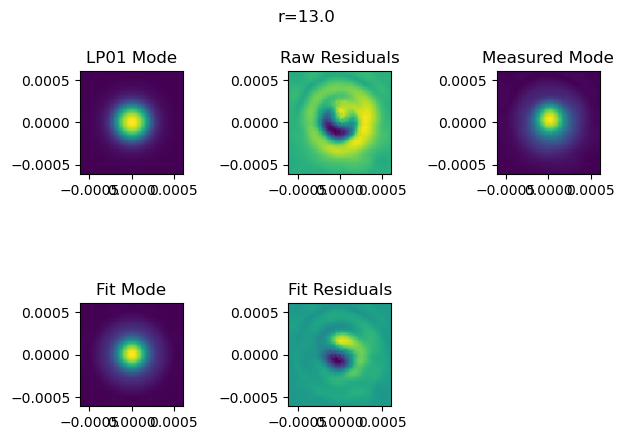

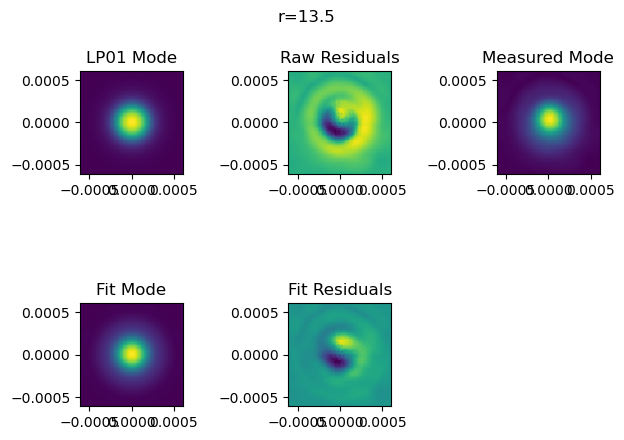

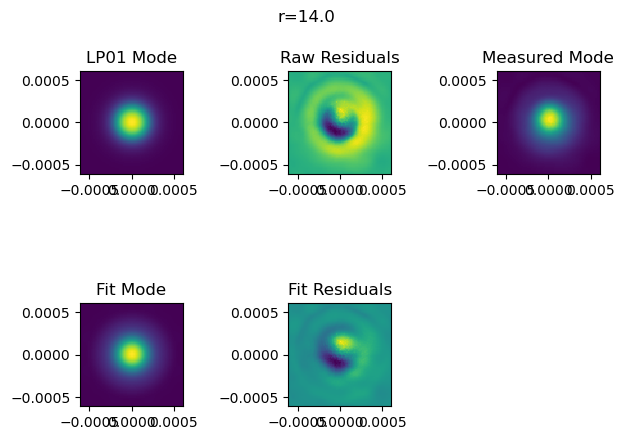

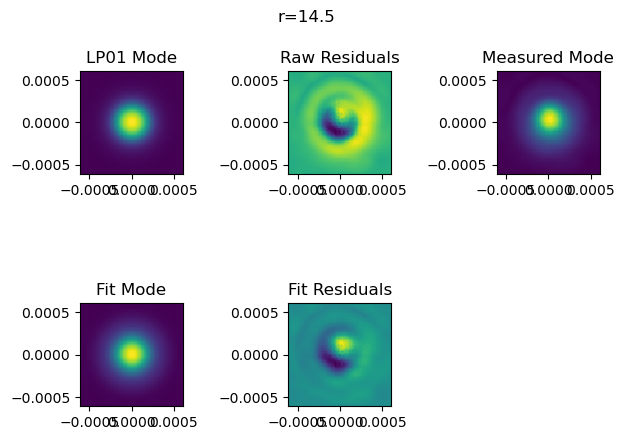

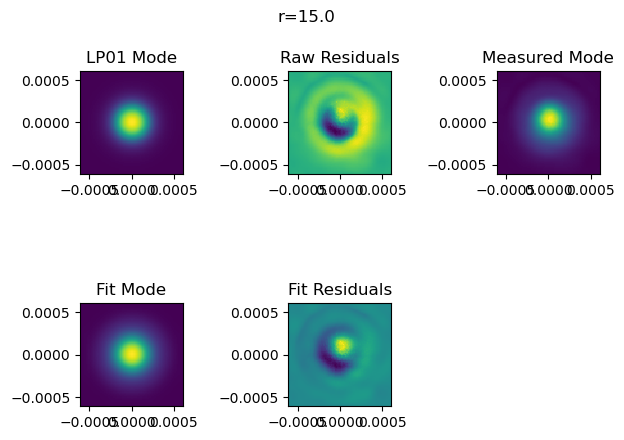

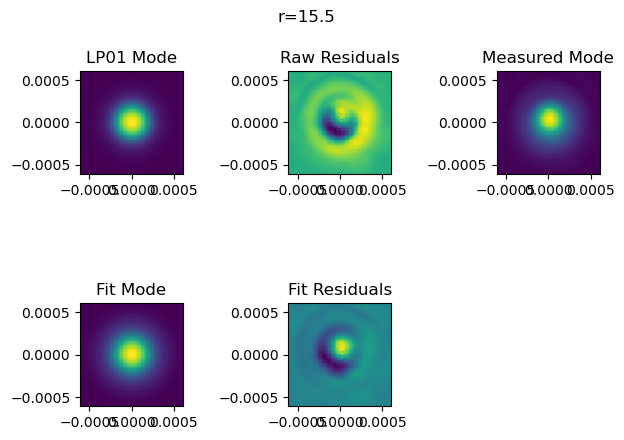

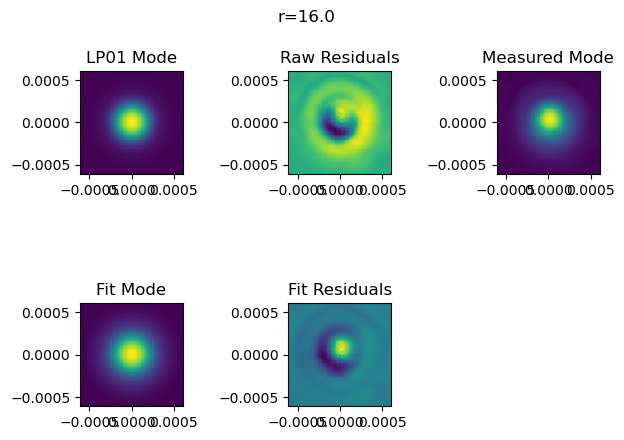

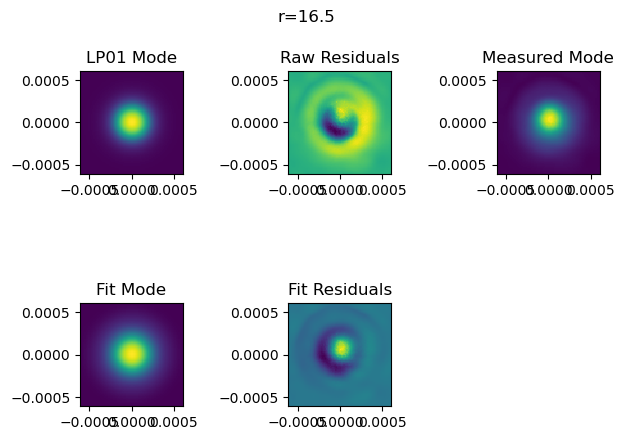

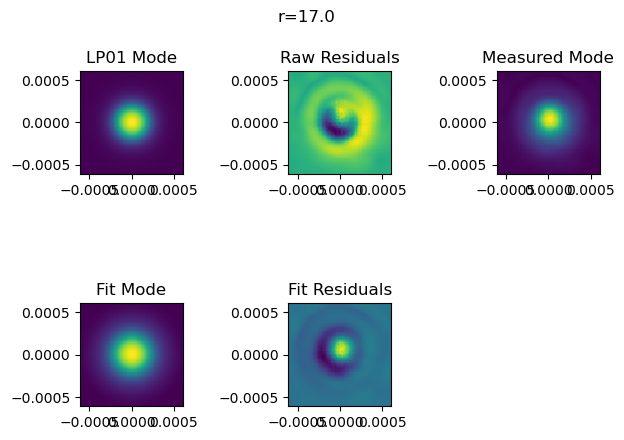

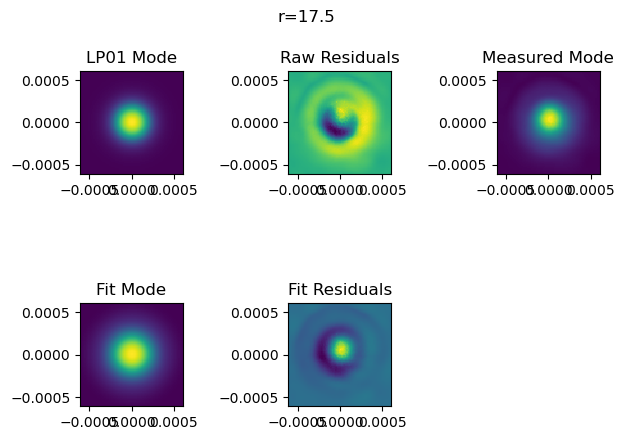

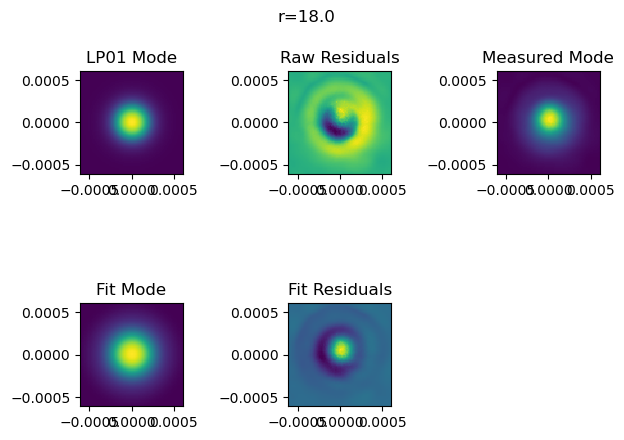

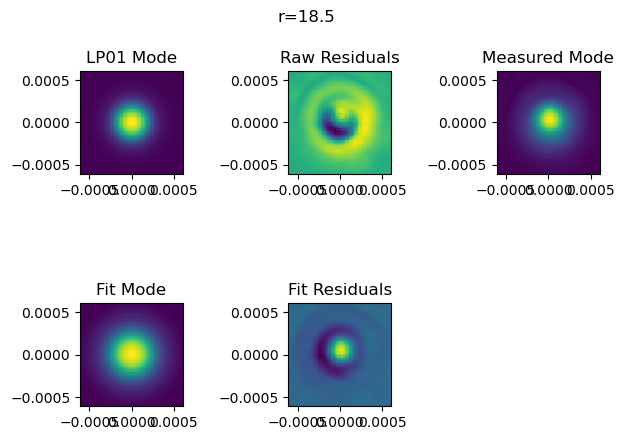

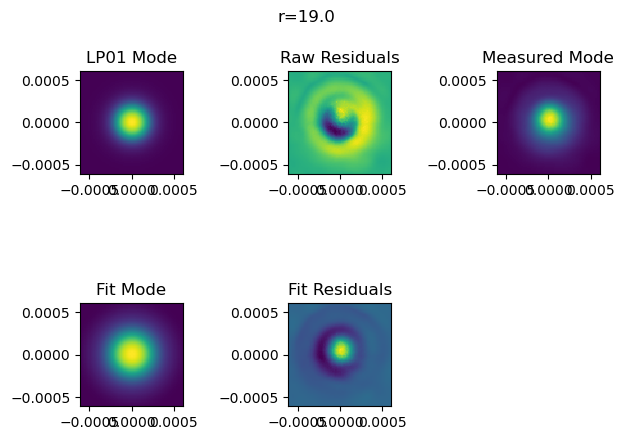

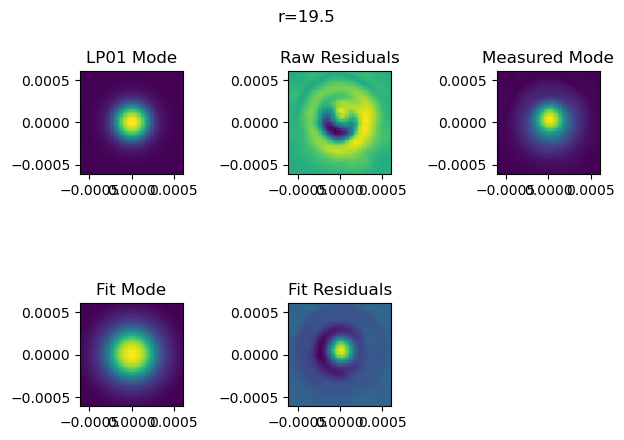

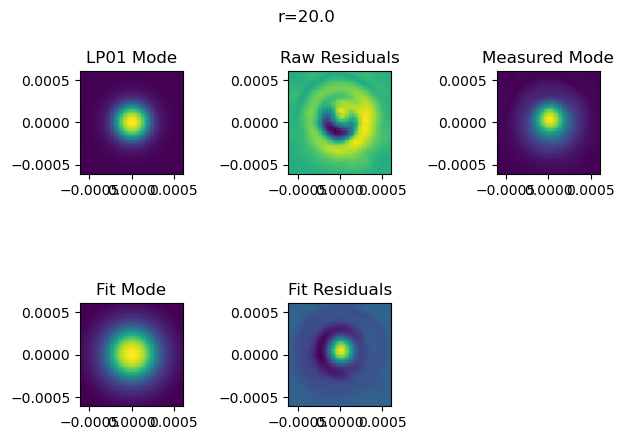

In [16]:
z_coeffs = np.load('z_coeffs.npy')
z_amps_fit_list = []
for k in range(len(rs)):
    print(rs[k])
    idxs = np.argmax(z_coeffs[k],axis=1)
    z_amps_fit = np.zeros(idxs.shape)
    for n in range(len(idxs)):
        z_amps_fit[n] = zamps[idxs[n]]

    print(z_amps_fit)
    z_amps_fit_list.append(z_amps_fit)

    #sim_fit_trunc = sim_mode_zernike([5],[0])
    #sq_int = np.sum(np.square(np.abs(sim_fit_trunc)))
    #sim_fit_trunc = sim_fit_trunc/np.sqrt(sq_int)

    #coeff_trunc = np.abs(np.sum(np.conj(ret_field)*sim_fit_trunc,axis=None)/np.sum(np.conj(sim_fit_trunc)*sim_fit_trunc,axis=None))
    #print(coeff_trunc)

    sim_fit = sim_mode_zernike(znums,z_amps_fit,rs[k])
    sq_int = np.sum(np.square(np.abs(sim_fit)))
    sim_fit = sim_fit/np.sqrt(sq_int)

    plt.figure()
    plt.subplot(2,3,1)
    imshow_field(lp01_mode)
    plt.title('LP01 Mode')
    plt.subplot(2,3,2)
    imshow_field(np.abs(ret_field)-np.abs(lp01_mode))
    plt.title('Raw Residuals')
    plt.subplot(2,3,3)
    imshow_field(np.abs(ret_field))
    plt.title('Measured Mode')
    plt.subplot(2,3,4)
    imshow_field(np.abs(sim_fit))
    plt.title('Fit Mode')
    plt.subplot(2,3,5)
    imshow_field(np.abs(ret_field)-np.abs(sim_fit))
    plt.title('Fit Residuals')
    plt.tight_layout()
    plt.suptitle('r='+str(rs[k]))

    final_coeff = np.abs(np.sum(np.conj(ret_field)*sim_fit,axis=None)/np.sum(np.conj(sim_fit)*sim_fit,axis=None))
    print(final_coeff)

(499, 499)


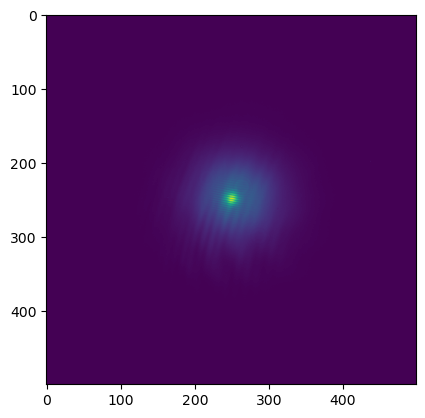

In [17]:
#try measuring 3 different fibers

bkgd = fits.getdata('smf_test_230127/bkgd_0.9968710000000001_avgs100.fits')
ref = fits.getdata('smf_test_230127/ref_0.9968710000000001_avgs100.fits')-bkgd

smf1_holo_raw = fits.getdata('smf_test_230127/smf1_holo_0.9968710000000001_avgs100.fits')-bkgd

centerx = 252
centery = 275
crop_width = 499

smf1_crop = smf1_holo_raw[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
ref1_crop = ref[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]

smf2_holo_raw = fits.getdata('smf_test_230127/smf2_holo_0.9968710000000001_avgs100.fits')-bkgd

centerx = 262
centery = 287
crop_width = 499

smf2_crop = smf2_holo_raw[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
ref2_crop = ref[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]

smf3_holo_raw = fits.getdata('smf_test_230127/smf3_holo_0.9968710000000001_avgs100.fits')-bkgd

centerx = 250
centery = 288
crop_width = 499

smf3_crop = smf3_holo_raw[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]
ref3_crop = ref[int(centerx-crop_width/2):int(centerx+crop_width/2),int(centery-crop_width/2):int(centery+crop_width/2)]

print(smf3_crop.shape)
plt.imshow(smf3_crop,vmin=0)



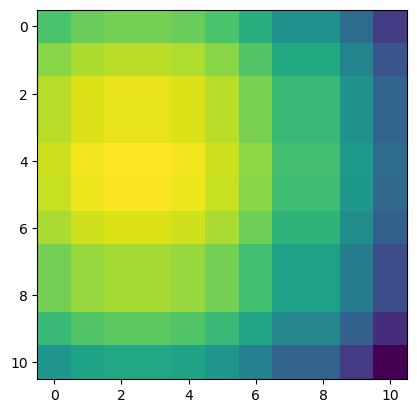

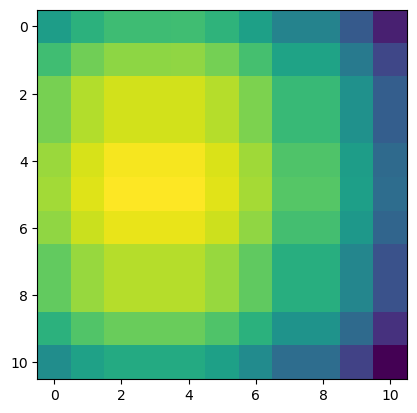

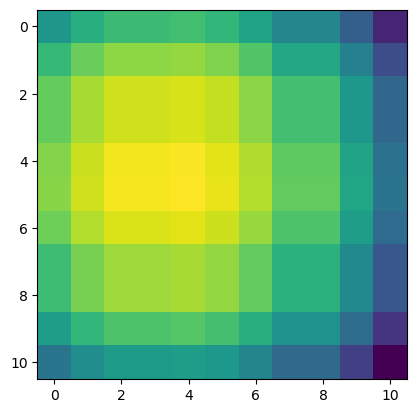

In [18]:
x_starts = 88
y_starts = 278

holos = [smf1_crop,smf2_crop,smf3_crop]
refs = [ref1_crop,ref2_crop,ref3_crop]

best_r = 14.25
best_Vnum = 3.0

best_xs = []
best_ys = []

for n in range(len(holos)):
    recon_map_field = retrieve_mode(holos[n],refs[n],x1=x_starts,y1=y_starts,box_width=131)
    grid = recon_map_field.grid
    lp_modes = make_lp_modes(grid, best_Vnum, best_r*15e-6)
    x1s = np.linspace(x_starts-4,x_starts+4,11)
    y1s = np.linspace(y_starts-4,y_starts+4,11)
    best_x, best_y = optimize_shift_location(holos[n],refs[n],x1s,y1s,131,lp_modes)
    best_xs.append(best_x)
    best_ys.append(best_y)

[Field(0.94532433), Field(0.95101141), Field(0.95596698)]
0.95076757503133
0.004573424539445258
0.9717694049138861
0.987823723482074
0.9929165907818676


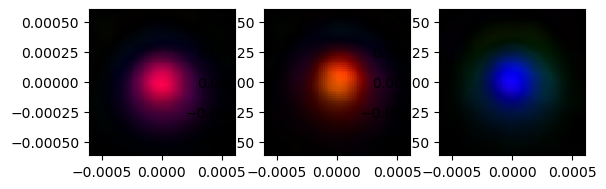

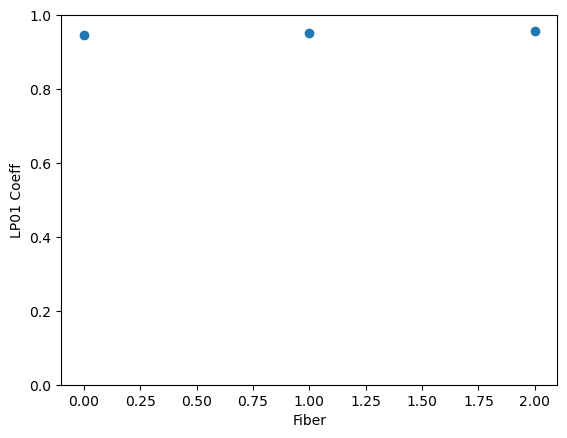

In [19]:
fields = []
coeffs = []
plt.figure()
for n in range(len(holos)):
    ret_field = retrieve_mode(holos[n],refs[n],x1=best_xs[n],y1=best_ys[n],box_width=131)
    sq_int = np.sum(np.square(np.abs(ret_field)))
    ret_field = ret_field/np.sqrt(sq_int)
    grid = ret_field.grid
    lp_modes = make_lp_modes(grid, best_Vnum, best_r*15e-6)
    lp_sq_int = np.sum(np.square(np.abs(lp_modes[0])))
    lp01_mode = lp_modes[0]/np.sqrt(lp_sq_int)
    #print(np.sum(np.square(np.abs(lp01_mode))))
    coeff = np.abs(np.sum(np.conj(lp01_mode)*ret_field,axis=None)/np.sum(np.conj(lp01_mode)*lp01_mode,axis=None))
    coeffs.append(coeff)
    fields.append(ret_field)
    plt.subplot(2,3,n+1)
    imshow_field(ret_field)
    
plt.figure()
plt.scatter(range(3),coeffs)
plt.ylim([0,1])
plt.xlabel('Fiber')
plt.ylabel('LP01 Coeff')

print(coeffs)
print(np.mean(coeffs))
print(np.std(coeffs)/np.mean(coeffs))

#what is fib 1 dot fib 2 etc?
field1 = fields[0]
field2 = fields[1]
field3 = fields[2]

fib1_2 = np.abs(np.sum(np.conj(field1)*field2,axis=None)/np.sum(np.conj(field1)*field1,axis=None))
fib1_3 = np.abs(np.sum(np.conj(field1)*field3,axis=None)/np.sum(np.conj(field1)*field1,axis=None))
fib2_3 = np.abs(np.sum(np.conj(field3)*field2,axis=None)/np.sum(np.conj(field3)*field3,axis=None))
print(fib1_2)
print(fib1_3)
print(fib2_3)

In [20]:
#fit best zernike value to data fiber 1
best_r = 14.25 #in pix
znums = [5,6,7,8,9,10]
zamps = np.linspace(-1,1,51)
z_coeffs = np.zeros((3,len(znums),len(zamps)))

ret_fields = []
for k in range(3):
    ret_field = retrieve_mode(holos[k],refs[k],x1=best_xs[k],y1=best_ys[k],box_width=131)
    sq_int = np.sum(np.square(np.abs(ret_field)))
    ret_field = ret_field/np.sqrt(sq_int)
    
    ret_fields.append(ret_field)
    for m in range(len(znums)):
        for n in range(len(zamps)):
            e_out = sim_mode_zernike([znums[m]],[zamps[n]],best_r)
            sq_int = np.sum(np.square(np.abs(e_out)))
            e_out = e_out/np.sqrt(sq_int)
            z_coeffs[k,m,n] = np.abs(np.sum(np.conj(ret_field)*e_out,axis=None)/np.sum(np.conj(e_out)*e_out,axis=None))

[ 0.08  0.16  0.    0.04  0.   -0.32]
0.9842078221471421
[ 0.16  0.04 -0.12  0.04  0.   -0.24]
0.9745406801029802
[ 0.12  0.08 -0.04  0.04 -0.04 -0.24]
0.9833125026183152
Coeffs from last time:
[0.12, 0.0, -0.12, 0.08, -0.04, -0.28]
Coeffs to use:
[ 0.14  0.06 -0.08  0.04 -0.02 -0.24]


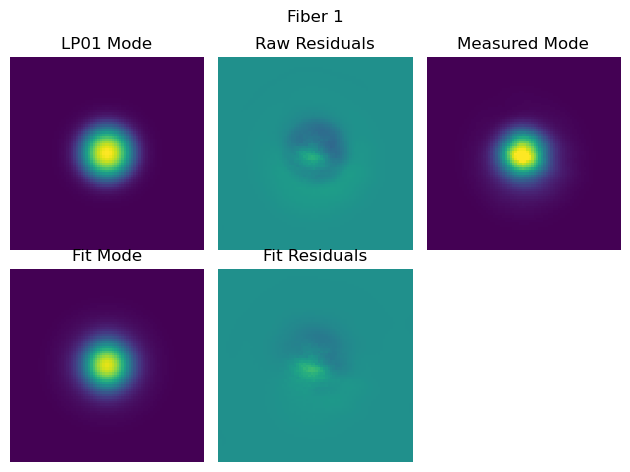

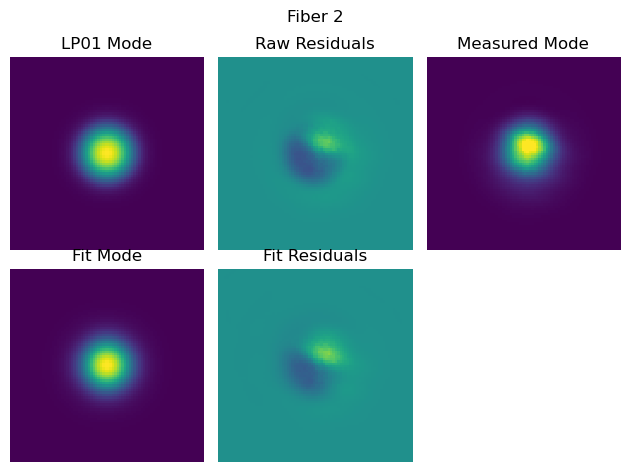

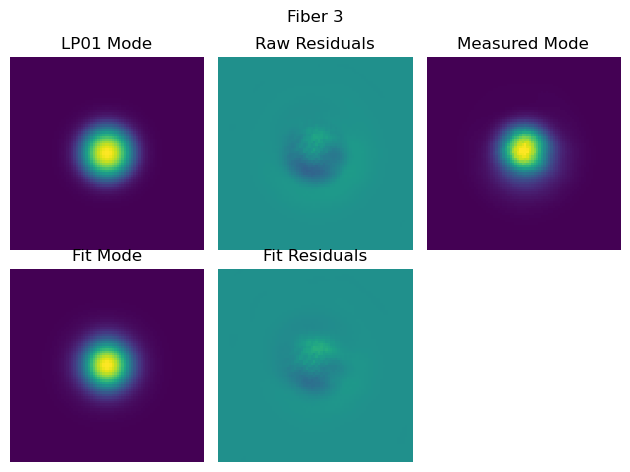

In [21]:
vmin_mode = 0
vmax_mode = 0.003
vmin_resids = -1.5e-3
vmax_resids = 1.5e-3

z_amps_fit_list = []
for k in range(3):
    idxs = np.argmax(z_coeffs[k],axis=1)
    z_amps_fit = np.zeros(idxs.shape)
    for n in range(len(idxs)):
        z_amps_fit[n] = zamps[idxs[n]]

    print(z_amps_fit)
    z_amps_fit_list.append(z_amps_fit)

    sim_fit = sim_mode_zernike(znums,z_amps_fit,best_r)
    sq_int = np.sum(np.square(np.abs(sim_fit)))
    sim_fit = sim_fit/np.sqrt(sq_int)

    plt.figure()
    plt.subplot(2,3,1)
    imshow_field(np.square(np.abs(lp01_mode)),vmin=vmin_mode,vmax=vmax_mode)
    plt.axis('off')
    plt.title('LP01 Mode')
    plt.subplot(2,3,2)
    imshow_field(np.square(np.abs(ret_fields[k]))-np.square(np.abs(lp01_mode)),vmin=vmin_resids,vmax=vmax_resids)
    plt.axis('off')
    plt.title('Raw Residuals')
    plt.subplot(2,3,3)
    imshow_field(np.square(np.abs(ret_fields[k])),vmin=vmin_mode,vmax=vmax_mode)
    plt.axis('off')
    plt.title('Measured Mode')
    plt.subplot(2,3,4)
    imshow_field(np.square(np.abs(sim_fit)),vmin=vmin_mode,vmax=vmax_mode)
    plt.axis('off')
    plt.title('Fit Mode')
    plt.subplot(2,3,5)
    imshow_field(np.square(np.abs(ret_fields[k]))-np.square(np.abs(sim_fit)),vmin=vmin_resids,vmax=vmax_resids)
    plt.axis('off')
    plt.title('Fit Residuals')
    plt.suptitle('Fiber '+str(k+1))
    plt.tight_layout()
    

    final_coeff = np.abs(np.sum(np.conj(ret_fields[k])*sim_fit,axis=None)/np.sum(np.conj(sim_fit)*sim_fit,axis=None))
    print(final_coeff)
    
print('Coeffs from last time:')
old_coeffs = [ 0.12,  0. ,  -0.12 , 0.08 ,-0.04 ,-0.28]
print(old_coeffs)

#best guess at coeffs to use:
coeffs_mean = (z_amps_fit_list[1]+z_amps_fit_list[2])/2

print('Coeffs to use:')
print(coeffs_mean)

np.save('system_coeffs',coeffs_mean)

(82, 82)


Text(0.5, 1.0, 'Cross-sections')

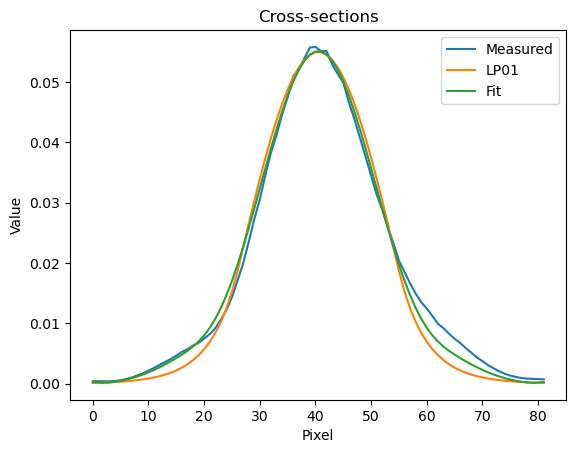

In [30]:
ret_field_3_shaped = ret_fields[2].shaped
sim_fit_shaped = sim_fit.shaped
lp01_mode_shaped = lp01_mode.shaped
print(ret_field_3_shaped.shape)

plt.figure()
plt.plot(np.abs(ret_field_3_shaped[41,:]),label='Measured')
plt.plot(np.abs(lp01_mode_shaped[41,:]),label='LP01')
plt.plot(np.abs(sim_fit_shaped[41,:]),label='Fit')
plt.legend()
plt.xlabel('Pixel')
plt.ylabel('Value')
plt.title('Cross-sections')